# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>


<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings;
warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [81]:
df = pd.read_csv("store_sharing.csv")

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [82]:
df.shape

(17414, 10)

In [83]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [84]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [85]:
df.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
5211,2015-08-09 18:00:00,3252,25.5,25.5,46.0,16.0,1.0,0.0,1.0,1.0
12455,2016-06-08 20:00:00,1907,16.5,16.5,78.0,19.5,2.0,0.0,0.0,1.0
5716,2015-08-30 19:00:00,1377,18.0,18.0,83.0,13.0,3.0,0.0,1.0,1.0
11060,2016-04-11 17:00:00,2760,13.0,13.0,82.0,7.0,3.0,0.0,0.0,0.0
5437,2015-08-19 04:00:00,68,16.0,16.0,72.0,13.0,1.0,0.0,0.0,1.0


In [86]:
df.duplicated().sum()

0

In [87]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [88]:
df.isnull().count()
#Bu iki yöntem arasındaki fark, df.isnull().sum() sadece eksik değerlerin sayısını döndürürken, df.isnull().count() her sütundaki toplam satır sayısını döndürür.

timestamp       17414
cnt             17414
t1              17414
t2              17414
hum             17414
wind_speed      17414
weather_code    17414
is_holiday      17414
is_weekend      17414
season          17414
dtype: int64

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


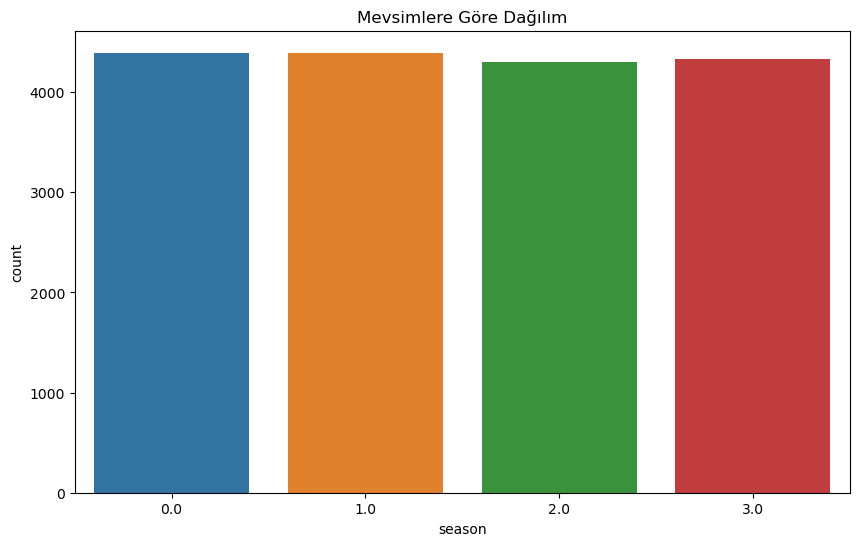

In [89]:
#discrete feature denildiği zaman katagorik veya ayrık sayısal değer içeren sutunlar kast edilir.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='season')
plt.title('Mevsimlere Göre Dağılım')
plt.show()

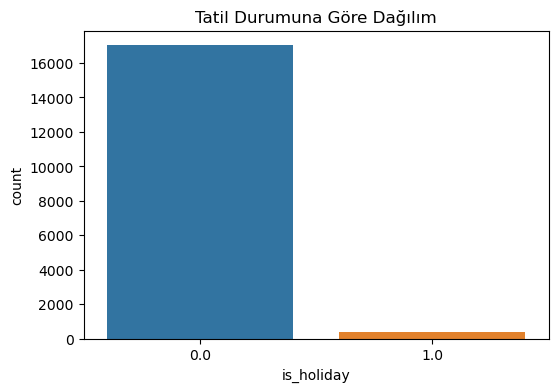

In [90]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_holiday')
plt.title('Tatil Durumuna Göre Dağılım')
plt.show()

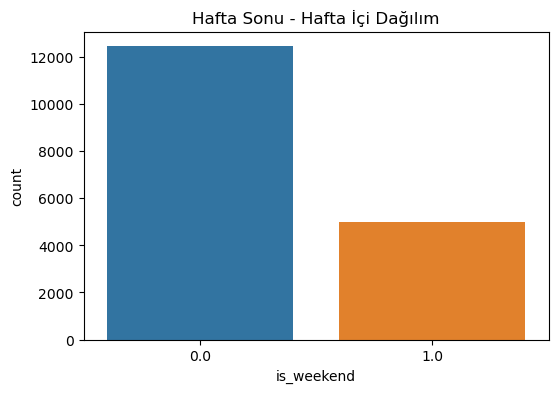

In [91]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_weekend')
plt.title('Hafta Sonu - Hafta İçi Dağılım')
plt.show()

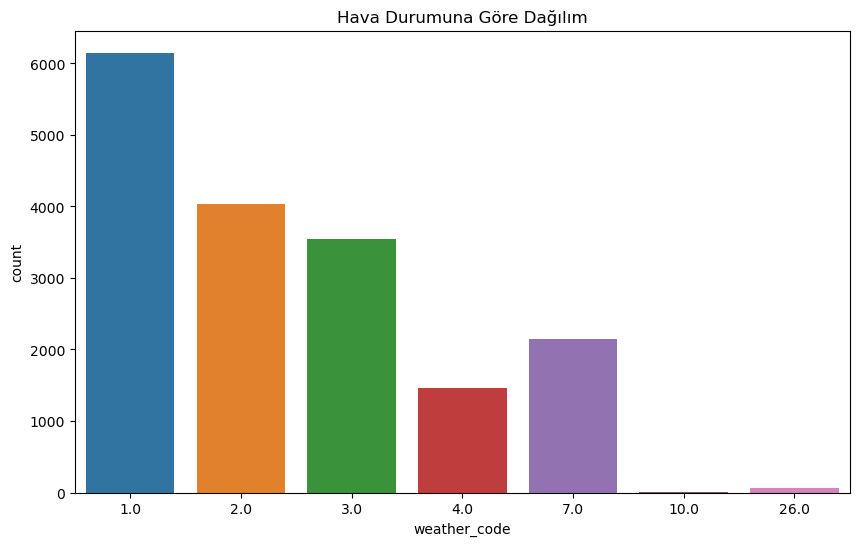

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather_code')
plt.title('Hava Durumuna Göre Dağılım')
plt.show()

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [93]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [94]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [95]:
df.set_index('timestamp')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [96]:
df["year"] = df["timestamp"].dt.strftime("%Y")
df.year.sample(5)

15710    2016
15307    2016
6215     2015
13615    2016
12970    2016
Name: year, dtype: object

In [97]:
df["month"] = df["timestamp"].dt.strftime("%m")
df.month.sample(5)

335      01
16558    11
1437     03
3034     05
12312    06
Name: month, dtype: object

In [98]:
df["year_of_month"] = df["timestamp"].dt.strftime("%Y-%m")
df.year_of_month.sample(5)

5362     2015-08
10362    2016-03
15953    2016-11
5031     2015-08
543      2015-01
Name: year_of_month, dtype: object

In [99]:
df["day_of_month"] = df["timestamp"].dt.strftime("%d")
df.day_of_month.sample(5)

11461    28
2737     28
8788     07
13319    15
2436     15
Name: day_of_month, dtype: object

In [100]:
df['hour'] = df['timestamp'].dt.hour
df.hour.sample(5)

1579     21
15971    20
4978      1
12686    11
13040    20
Name: hour, dtype: int32

In [101]:
df['day_of_week'] = df['timestamp'].dt.dayofweek
df.day_of_week.sample(5)

13113    2
2370     0
16303    4
14651    5
13382    0
Name: day_of_week, dtype: int32

In [102]:
df.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,year_of_month,day_of_month,hour,day_of_week
11113,2016-04-13 22:00:00,669,14.0,14.0,57.0,9.0,1.0,0.0,0.0,0.0,2016,04,2016-04,13,22,2
5978,2015-09-10 17:00:00,4013,18.5,18.5,62.0,27.0,2.0,0.0,0.0,2.0,2015,09,2015-09,10,17,3
2853,2015-05-03 05:00:00,63,12.0,12.0,94.0,15.0,7.0,0.0,1.0,0.0,2015,05,2015-05,03,5,6
8065,2015-12-07 18:00:00,2952,12.0,12.0,82.0,16.0,1.0,0.0,0.0,3.0,2015,12,2015-12,07,18,0
16092,2016-11-09 21:00:00,579,8.0,5.0,82.0,20.0,2.0,0.0,0.0,2.0,2016,11,2016-11,09,21,2


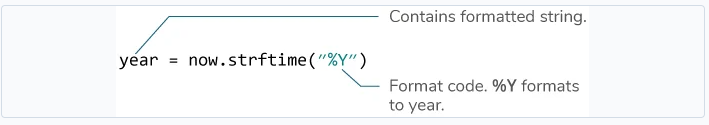

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [107]:
#korelasyonu heatmap ile görselleştiriyoruz.
numeric_columns =df.select_dtypes(include=[np.number])
numeric_df = df[numeric_columns.columns]
numeric_df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'hour', 'day_of_week'],
      dtype='object')

In [108]:
correlation_matrix = numeric_df.corr()

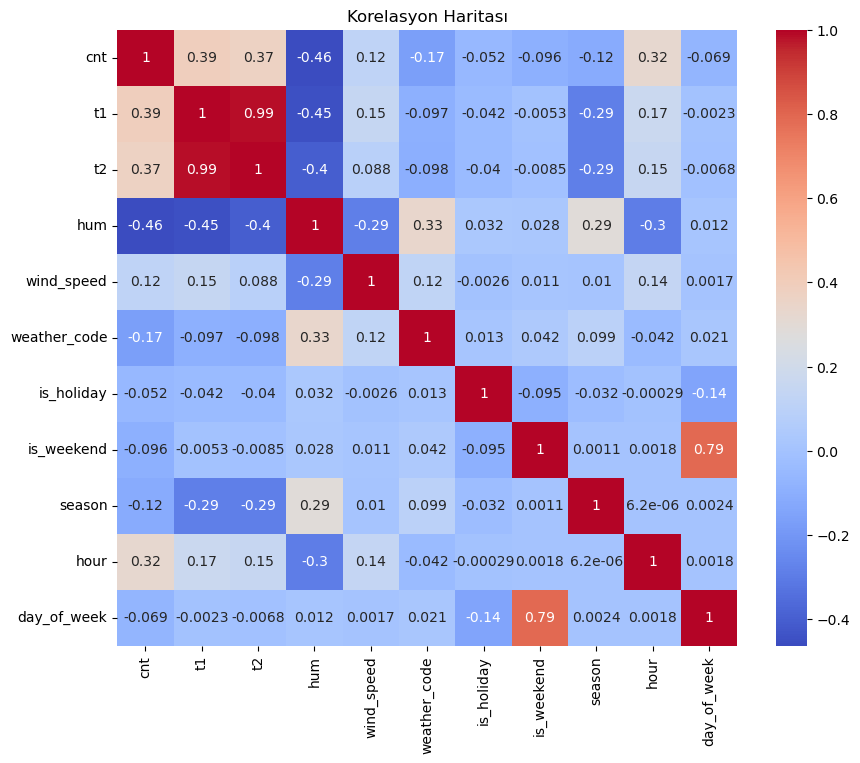

In [109]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') #annot: Bu parametre, heatmap üzerindeki her hücreye değerlerin yazılmasını sağlar.
plt.title('Korelasyon Haritası')
plt.show()
#cmap='coolwarm' -> negatif korelasyonları mavi tonlarıyla,
#pozitif korelasyonları ise kırmızı tonlarıyla temsil eder
#linewidths=.5, heatmap'teki kareler arasındaki çizgi kalınlığını belirtir. 


<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

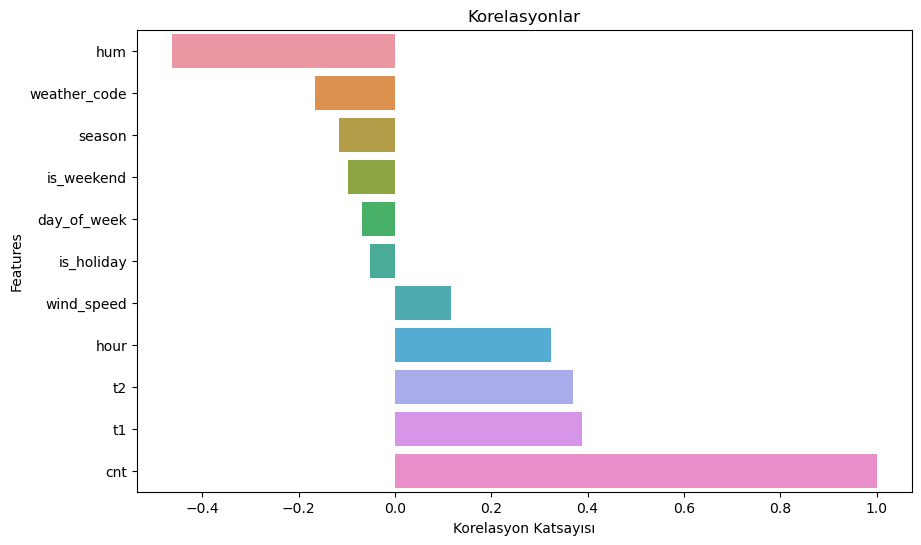

In [110]:
#korelasyonu küçükten büyüğe barplot ile gösteriyorum
target_corr = correlation_matrix[['cnt']].sort_values(by='cnt', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr['cnt'], y=target_corr.index)
plt.title('Korelasyonlar')
plt.xlabel('Korelasyon Katsayısı')
plt.ylabel('Features')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

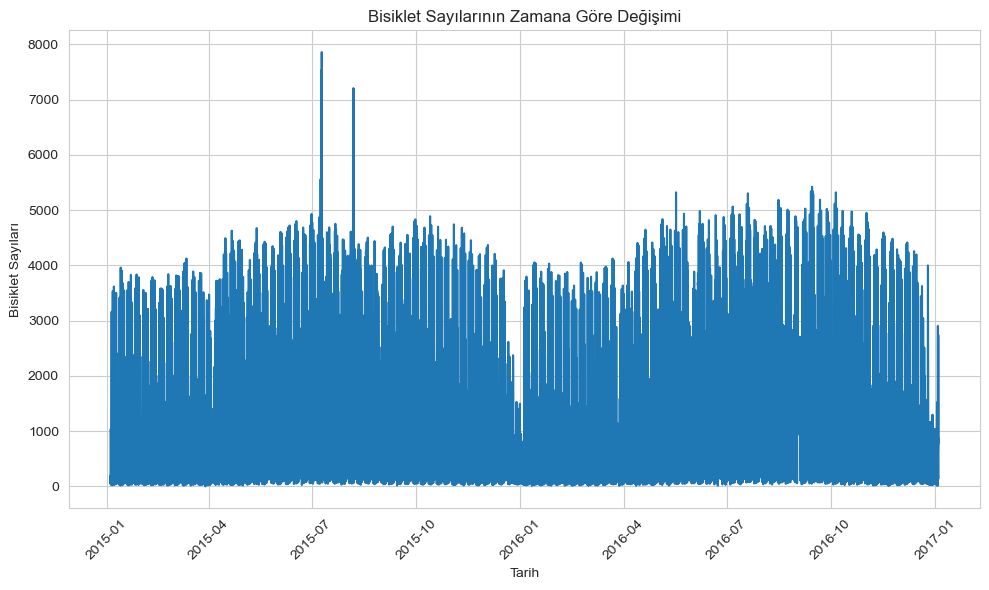

In [111]:

sns.set_style("whitegrid")  #ızgaralı beyaz arka plan çağırdım

plt.figure(figsize=(10, 6))  
sns.lineplot(x = df.timestamp, y = "cnt", data = df)  
plt.title('Bisiklet Sayılarının Zamana Göre Değişimi')  
plt.xlabel('Tarih')  
plt.ylabel('Bisiklet Sayıları') 
plt.xticks(rotation=45)  # x-ekseni etiketlerini daha iyi okunabilirlik için döndürdü
plt.tight_layout()  #grafiğin daha düzenli durması için (başlıklar, eksen etiketleri vs)
plt.show()  

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [113]:
#pandas dataframe içinde gruplama yaparak toplam değerlerin olduğu bir df_sum oluşturuyoruz.
df_sum = pd.DataFrame(df.groupby("year_of_month").cnt.sum())
df_sum

,cnt
year_of_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


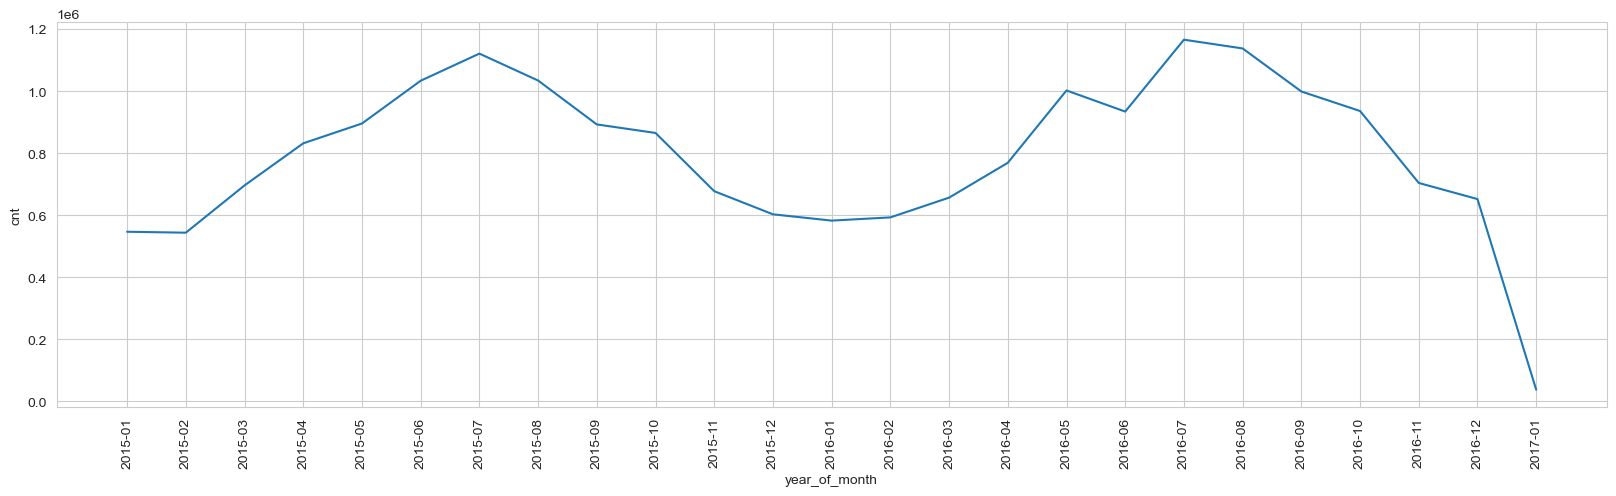

In [114]:
plt.figure(figsize=(20,5))
sns.lineplot(x="year_of_month",y="cnt", data = df_sum)
plt.xticks(rotation=90); #bu matplotlib kütüphanesinin fonksiyonu ile x ekseni üzerinde işaretlerin dönme açısını belirler.

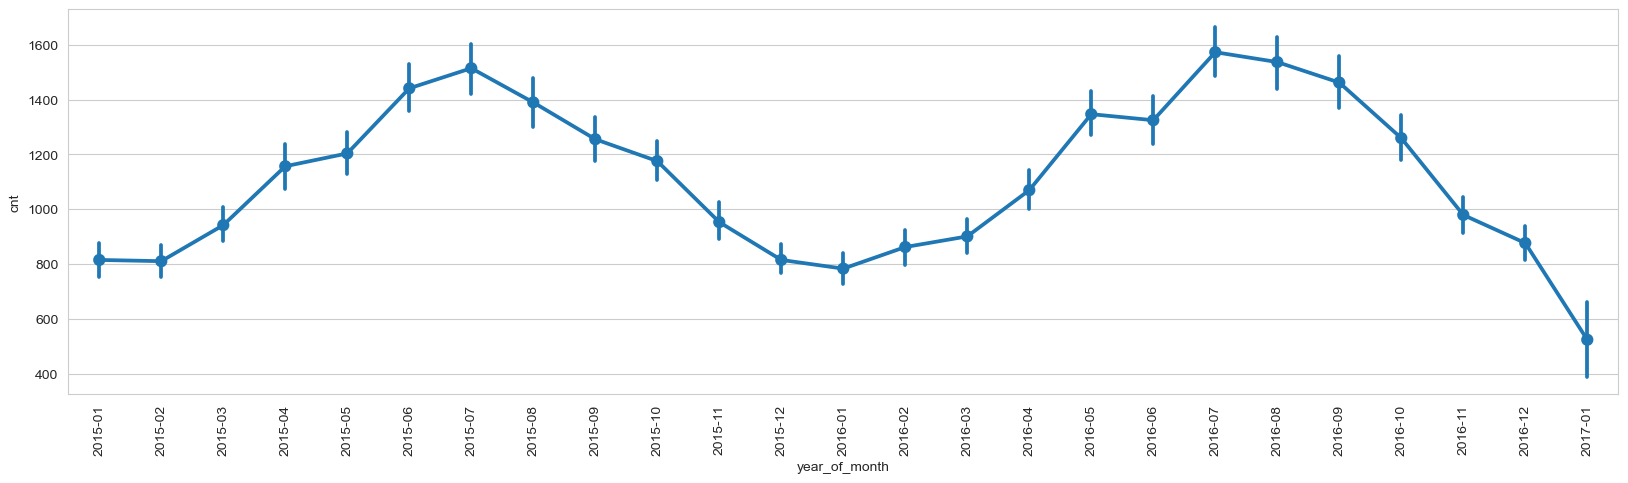

In [115]:
plt.figure(figsize=(20,5))
sns.pointplot(x="year_of_month",y="cnt", data = df)
plt.xticks(rotation=90);

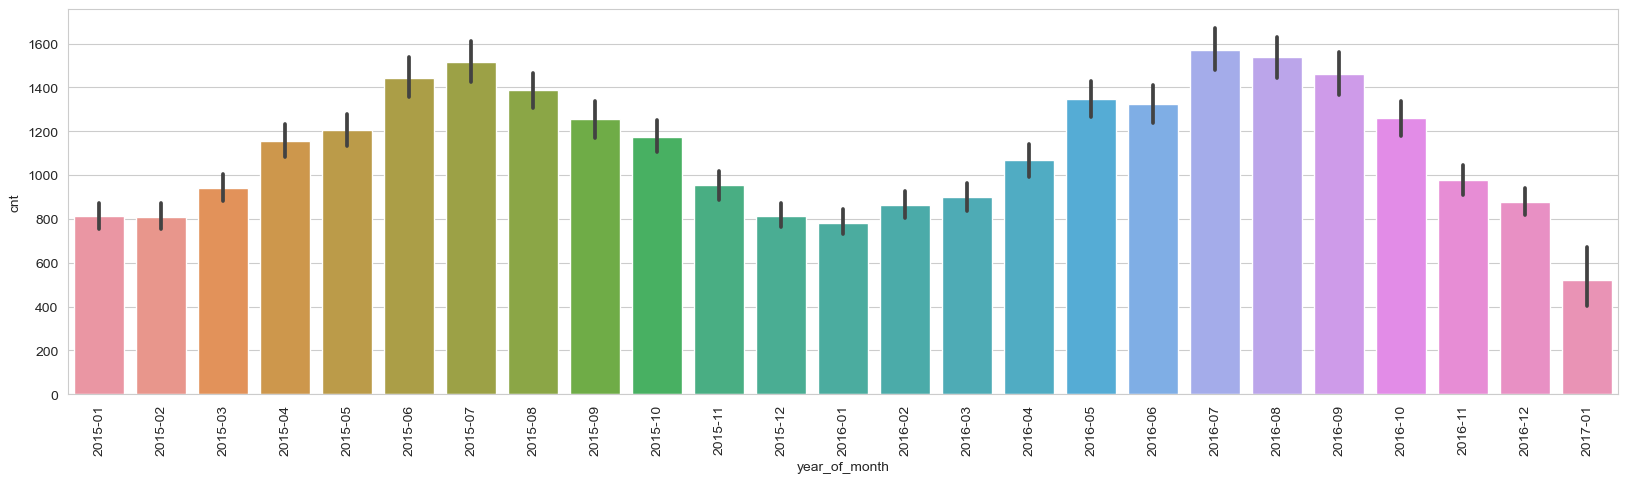

In [116]:
plt.figure(figsize=(20,5))
sns.barplot(x="year_of_month",y="cnt", data = df)
plt.xticks(rotation=90);

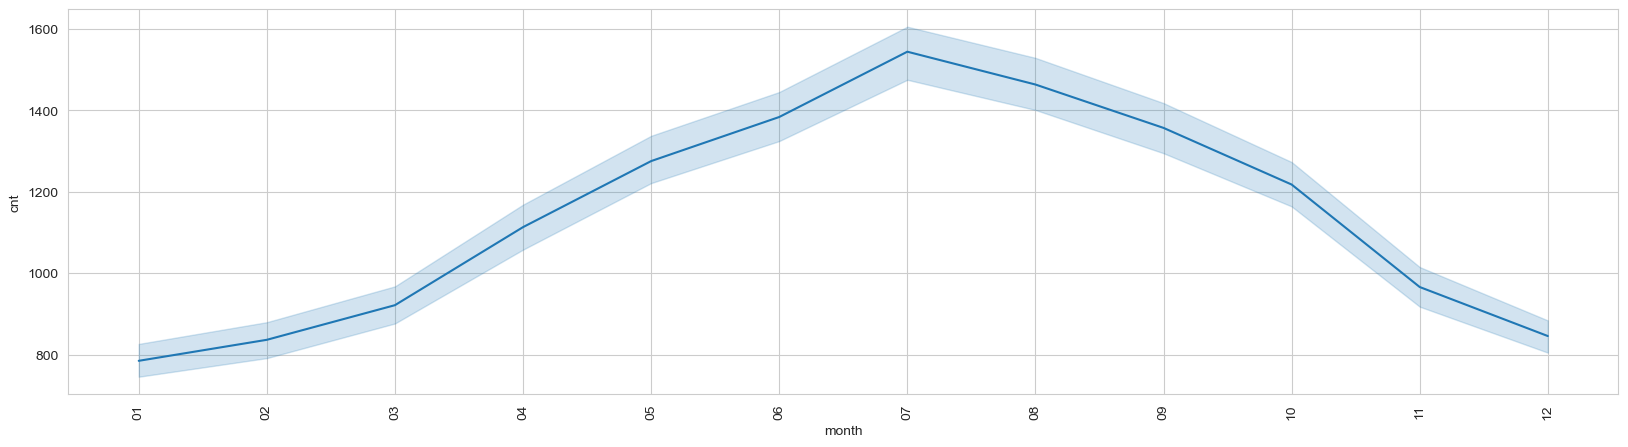

In [117]:
plt.figure(figsize=(20,5))
sns.lineplot(x="month",y="cnt", data = df)
plt.xticks(rotation=90);

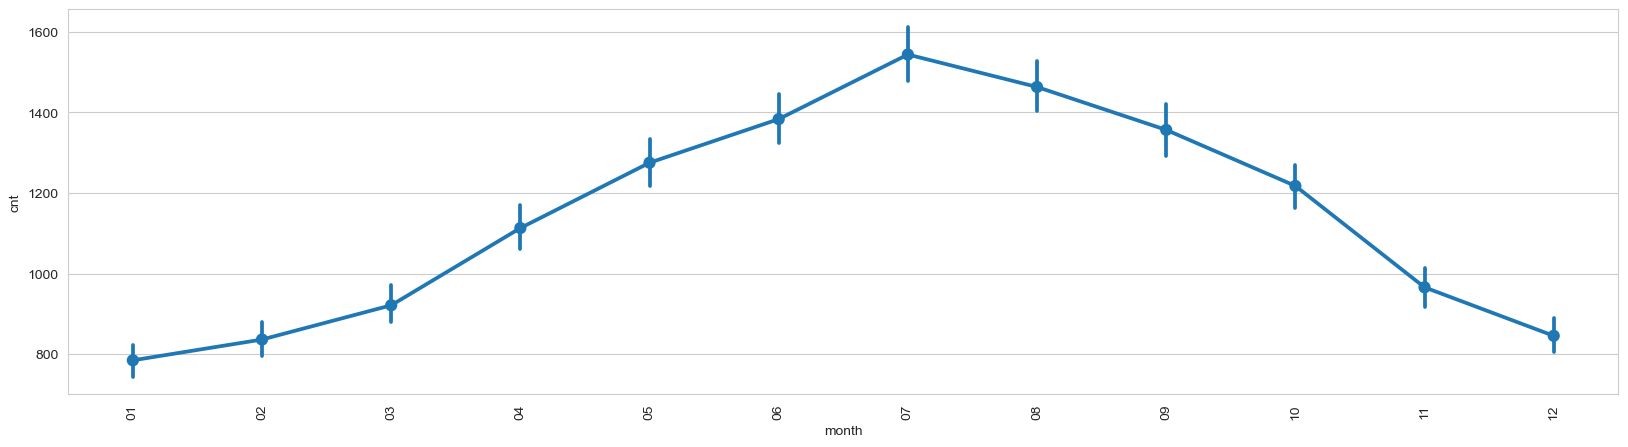

In [118]:
plt.figure(figsize=(20,5))
sns.pointplot(x="month",y="cnt", data = df)
plt.xticks(rotation=90);

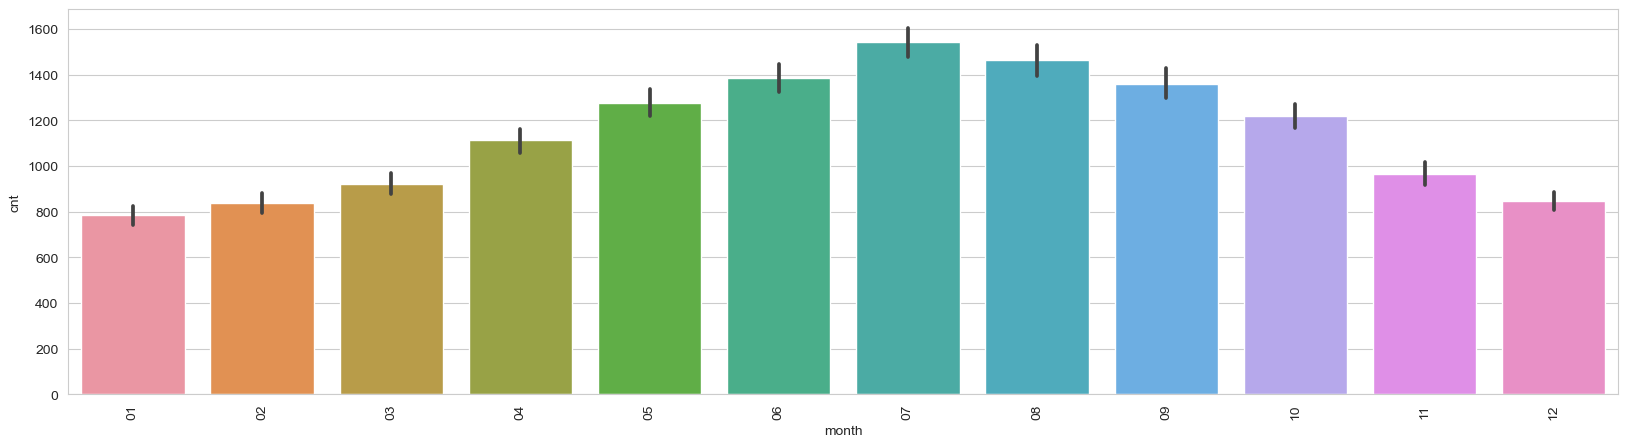

In [119]:
plt.figure(figsize=(20,5))
sns.barplot(x="month",y="cnt", data = df)
plt.xticks(rotation=90);

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

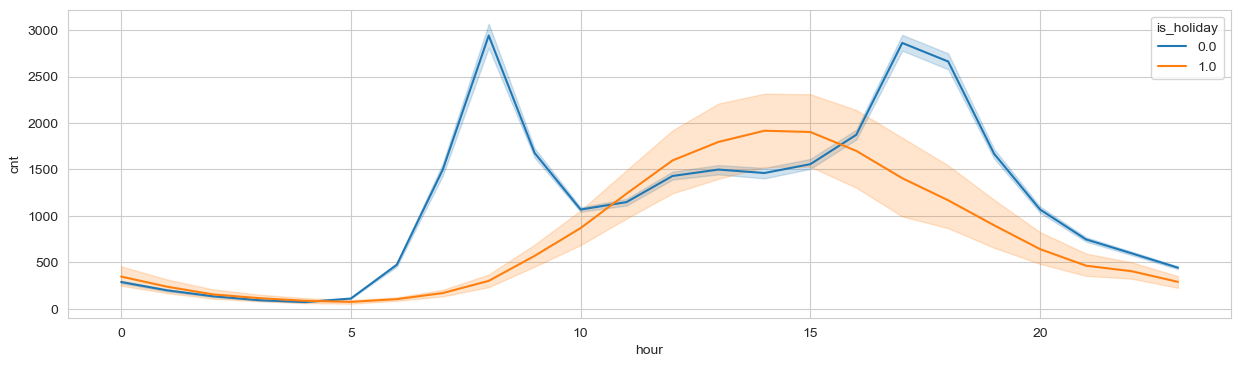

In [120]:
#seaborn hue parametresi ile farklı katagorileri aynı grafikte  görebiliriz.
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_holiday");

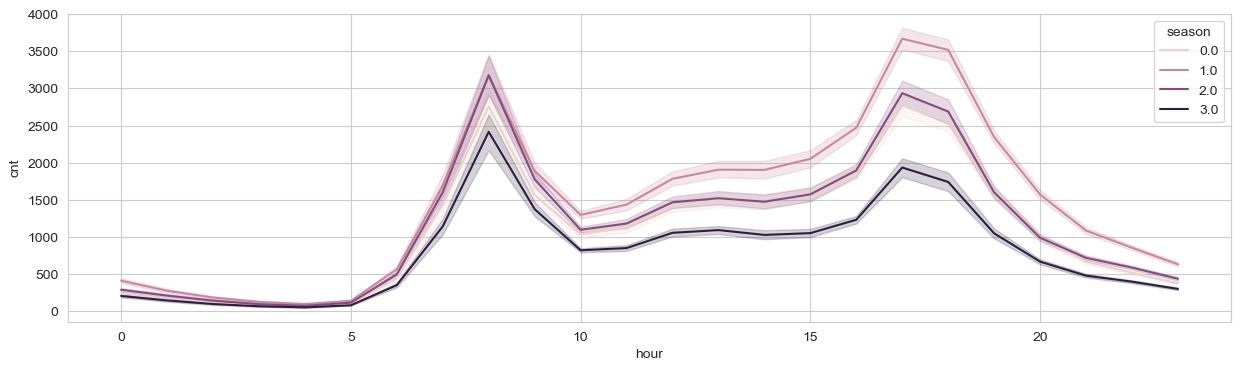

In [121]:
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="season");

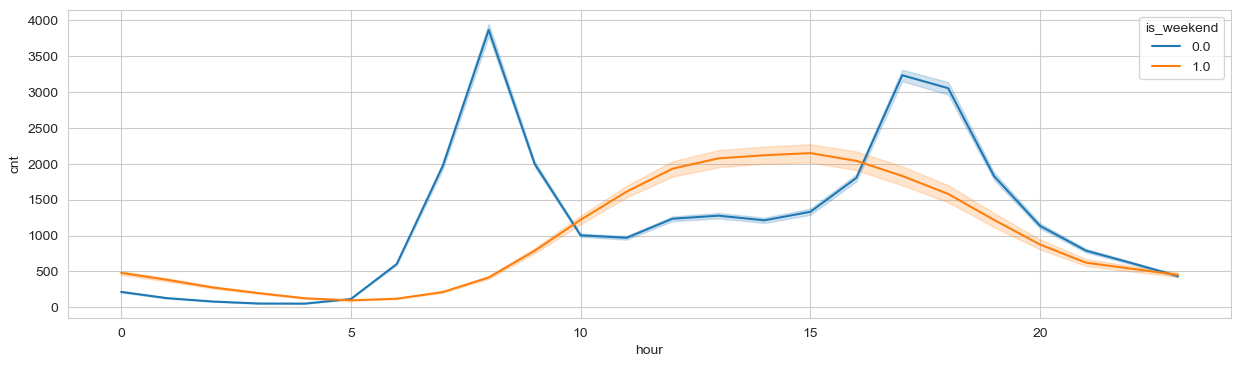

In [122]:
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_weekend");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

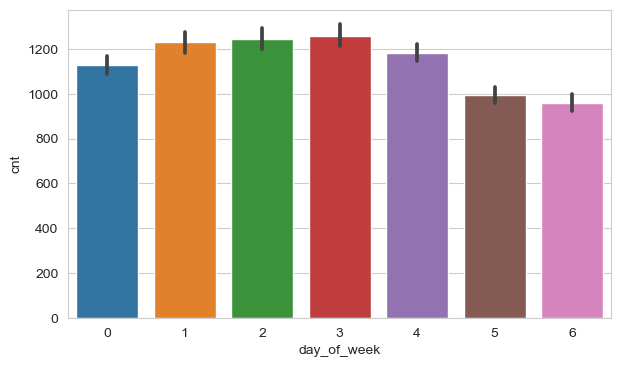

In [123]:
plt.figure(figsize=(7,4))
sns.barplot(x="day_of_week", y="cnt", data=df);

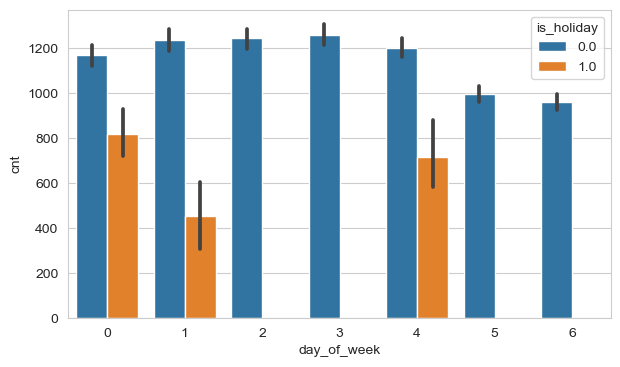

In [124]:
plt.figure(figsize=(7,4))
sns.barplot(x="day_of_week", y="cnt", data=df, hue = "is_holiday");
#buradaki 3. gün neden kaynaklandı?

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

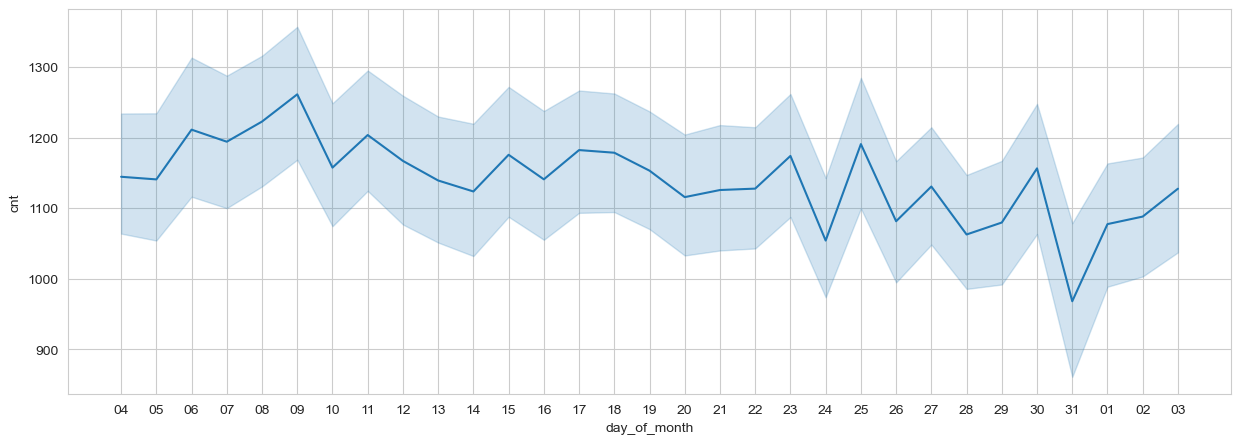

In [125]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="day_of_month", y="cnt");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

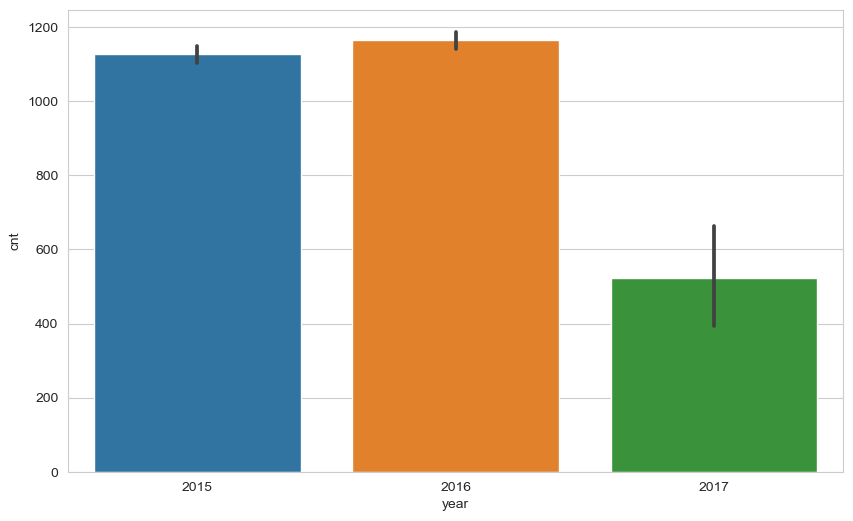

In [126]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year",y="cnt");

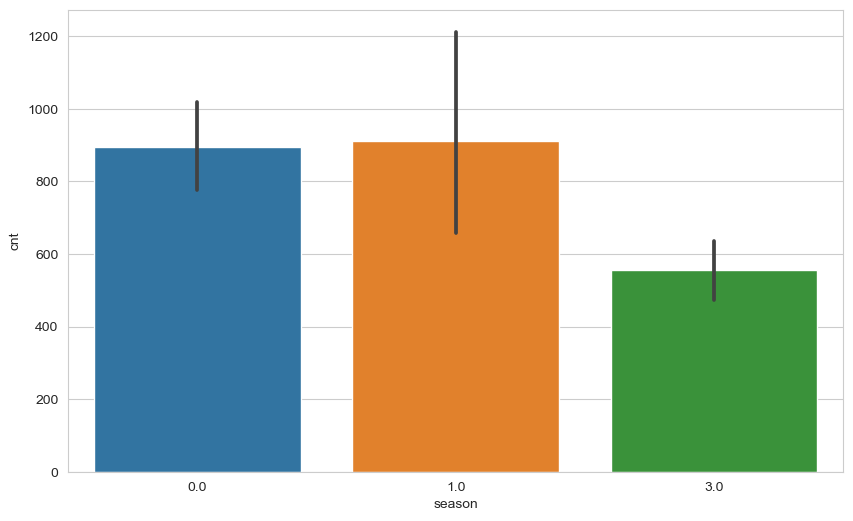

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(data=df[df["is_holiday"]==1], x="season",y="cnt") ;

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

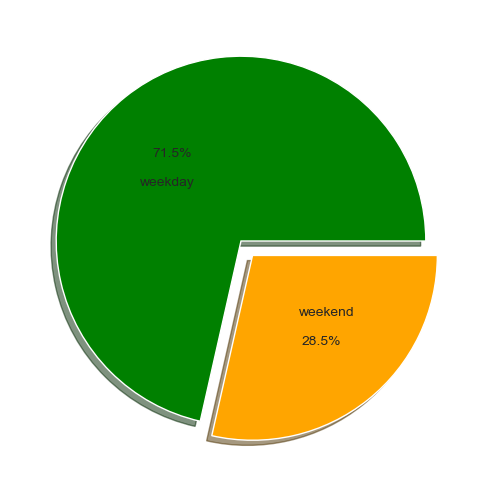

In [128]:
fig, ax = plt.subplots(figsize=(6,6))

colors_list = ["green","orange"] #renkleri belirledik
explode_list = [0, 0.1] #dilimlerin merkezden ne kadar ayrılacağını belirledik (ilk dilim yerinde, ikincisi ayrıldı)

ax.pie(df.is_weekend.value_counts().values,
      labels=["weekday","weekend"], # dilimlerin isimleri
      labeldistance=0.4, #etiketlerin merkeze uzaklığı
      autopct="%.1f%%", #dilimin yüzde olarak gösterimi(virgülden sonra 1 basamak olacak şekilde)
       shadow=True, # gölge efekti verdik
      colors = colors_list, explode=explode_list);

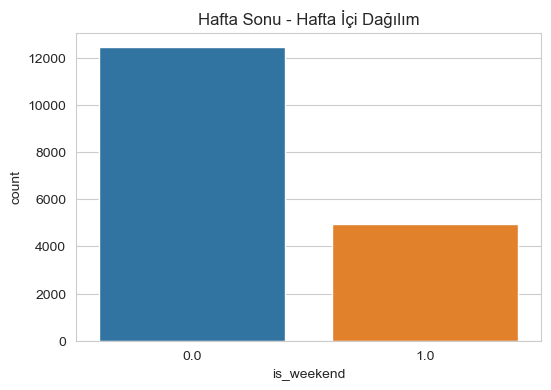

In [129]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_weekend')
plt.title('Hafta Sonu - Hafta İçi Dağılım')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

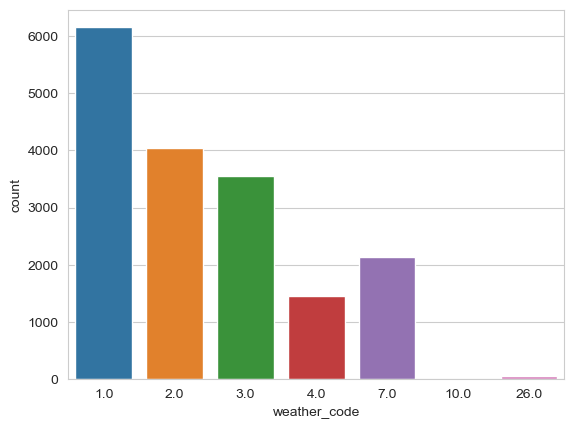

In [130]:
sns.countplot(x="weather_code", data=df);

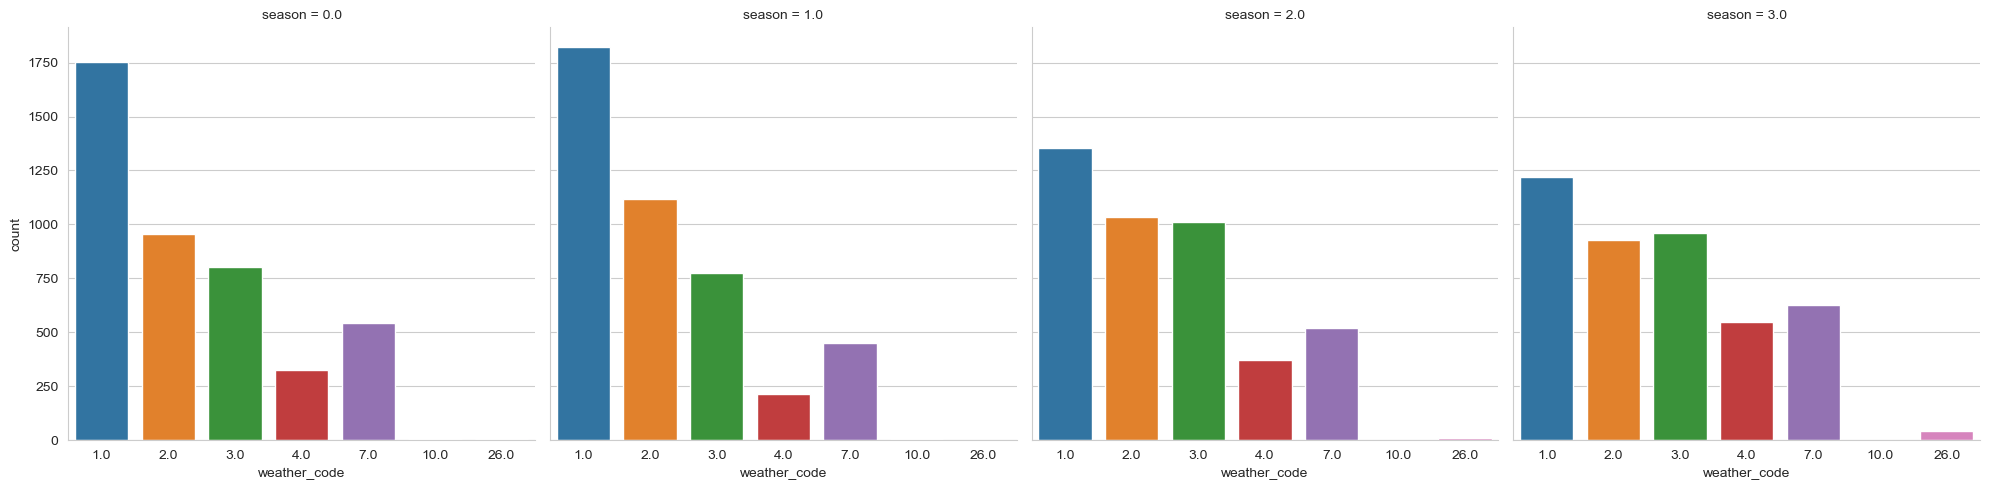

In [131]:
sns.catplot(x="weather_code", data=df, col="season", kind="count"); 
#col="season" season sütunundaki farklı değerler için ayrı grafik sütunları oluşturur
#kind="count": Grafiğin türünü belirler.

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>



<div class="alert alert-warning alert-info">
<span style=" color:red"> 
Yaptığımız çalışma sonucunda grafiklerden çıkarılacak sonuçlar şöyle: <br>


1)Mevsimlere göre kullanım sayıları arasında çok küçük farklar var.

2)Tatil günlerinde bisiklet kullanımı çok az.

3)Hafta içi günlerde bisiklet kullanımı daha fazla.(hafta sonunun nerdeyse 2,5 katı)

4)En çok kullanım açık havalarda. Karlı, fırtınalı ve soğuk günlerde kullanım 0 veya 0'a yakın.

5)Bisiklet kullanımı  ile korelasyonu en yüksek olanlar sıcaklık ve saat değerleri, en az olan nem oranı.

6)En yüksek kullanımlar temmuz ayında, en düşük kullanımlar ocak ayında

7)Tatil olmayan günlerde iş gidiş geliş saatlerinde kullanım yoğun (5-10 ve 15-20 arası). Tatil günlerinde   10-15 arası yoğun

8)Hafta içi günlerde iş gidiş geliş saatlerinde kullanım yoğun (5-10 ve 15-20 arası). Hafta sonu günlerde 10-20 arası yoğun

9)Her mevsimde saatlere göre dağılım nerdeyse aynı

10)En çok kullanım 2016, en az kullanım 2017 yılında

</span>


<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
